In [1]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [2]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in range(10):
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

100

In [44]:
layer_size = 10*4
c = 4

I = np.zeros(n_mnist_pixels)
O = np.zeros(layer_size)
W = np.random.rand(O.size, I.size) * 0.001
print('W', W.shape, W.max(), W.min(), np.median(W))

push_delta = 0.4
k = 1

prec = 1e-30

epoch_cnt = 100
eps0 = 0.02

lr = 0.085

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    for i_idx in samples_idx:
        img = mndata.train_images[i_idx]

        # infer
        I = np.array(img) / 255
        # DO = 1 / np.exp(np.abs(I*c - W)**2)
        # DO = 1 - np.abs(I*2 - W)
        DO = np.exp((W - I)**2 * -20.00005)
        O = np.sum(DO, axis=1)
        # print('O', O.shape, O.max(), O.min(), np.median(O))

        # train
        # dW = (I - W) * O[np.newaxis].T
        # dW = np.sign(I * c - W) * (1 - DO) * O[np.newaxis].T
        # dW = (I - (W/c)) * 1e-2 * O[np.newaxis].T
        # print('dW', dW.shape, dW.max(), dW.min(), np.median(dW))

        winner_ids = np.argsort(O)[::-1]

        D = np.zeros(O.shape)
        D[winner_ids[0]] = 1
        D[winner_ids[1:1+k]] += -push_delta
        D = D[np.newaxis].T

        # update
        # dW_nc = np.abs(np.max(dW))
        # if dW_nc < prec:
        #     dW_nc = prec
        # dW = dW / np.abs(np.max(dW))
        # ws[:, winner] * (1 - lr) + x * lr
        O /= np.max(np.abs(O))
        O = O[np.newaxis].T
        update_ids = winner_ids[:1+k]
        # print(update_ids, W[update_ids].shape, I[update_ids].shape, dW[update_ids].shape)
        W[update_ids] = W[update_ids] * (1 - lr) + (I * lr * D[update_ids] * O[update_ids])

print('W', W.shape, W.max(), W.min(), np.median(W))


W (40, 784) 0.0009999378386050643 1.330765003260126e-08 0.0005021082005121768
W (40, 784) 0.9962495817656412 -0.38858098074007724 3.2215892922036145e-12


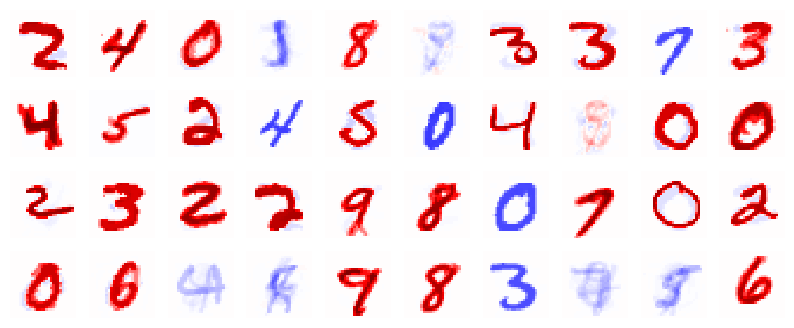

In [46]:
row_size = 10
col_size = int(layer_size / row_size)

figure(figsize=(row_size, col_size))

for col_idx in range(col_size):
    for row_idx in range(row_size):
        n_W_idx = col_idx * row_size + row_idx

        aimg = W[n_W_idx].reshape(img_side, img_side)

        subplot(col_size, row_size, n_W_idx + 1)

        imshow(aimg, interpolation='none', aspect='auto', cmap='seismic', vmax=1, vmin=-1)
        axis("off")

show()
